In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import os

In [59]:
%cd /content/drive/My Drive/Outex Dataset

/content/drive/My Drive/Outex Dataset


In [60]:
%ls

Class1/   Class16/  Class22/  Class7/
Class10/  Class17/  Class23/  Class8/
Class11/  Class18/  Class24/  Class9/
Class12/  Class19/  Class3/   ConfusionMatrixInceptionV3_5epochs_Outex.png
Class13/  Class2/   Class4/   InceptionV3_WithoutAug_5epochs_Outex/
Class14/  Class20/  Class5/   PlotAccuracyInceptionV3_5epochs_Outex.png
Class15/  Class21/  Class6/   PlotLossesInceptionV3_5epochs_Outex.png


In [61]:
import cv2
from glob import glob
from matplotlib import image as img


In [62]:
images, labels = [], []

In [63]:
paths={}
for i in range(24):
  paths[i]='Class'+str((i+1))


In [64]:
for i in range(24):
  g=glob(paths[i]+'/*.png')
  for image_path in g:  
    try:
        image = cv2.imread(image_path)
        image = cv2.resize(image, (224, 224)) # default values
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converting to RGB
        images.append(image)
        labels.append(i)
    except:
        print(image_path)
 

In [65]:
print(len(images))
print(len(labels))

960
960


In [66]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 

In [67]:
import numpy as np
data = np.array(images)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

(960, 224, 224, 3)
(960,)


In [68]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels, num_classes = 24)
#y_train=labels
labels.shape

(960, 24)

In [69]:
# splitting training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels,test_size = 0.2,random_state = 101,shuffle = True)
print('training:')
print(X_train.shape)
print(y_train.shape)
print('testing:')
print(X_test.shape)
print(y_test.shape)

training:
(768, 224, 224, 3)
(768, 24)
testing:
(192, 224, 224, 3)
(192, 24)


In [70]:
X_train=X_train/255

In [71]:
X_test=X_test/255

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagenerator = ImageDataGenerator(horizontal_flip = True, vertical_flip = True)
augmented_training_data = datagenerator.flow(X_train, y_train, batch_size = 32)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


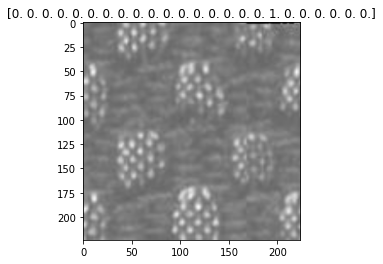

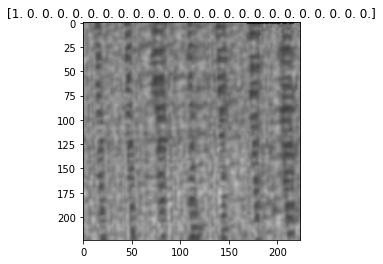

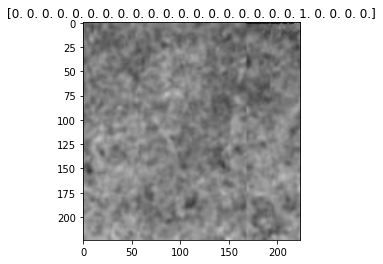

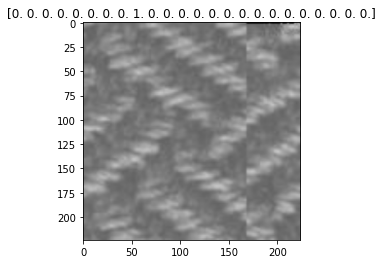

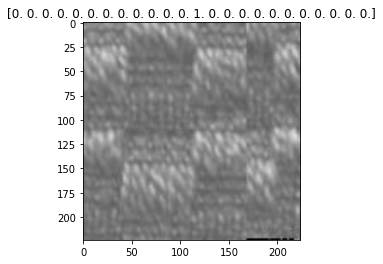

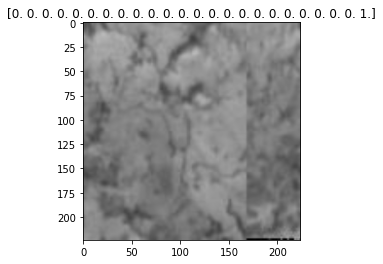

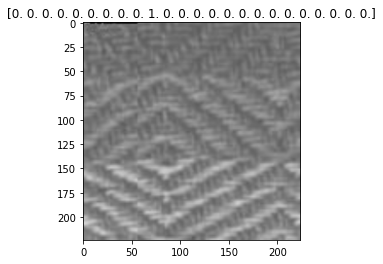

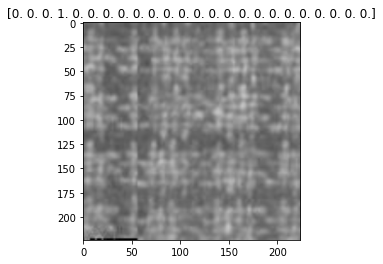

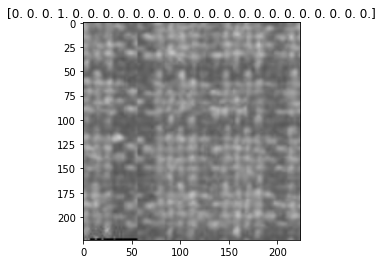

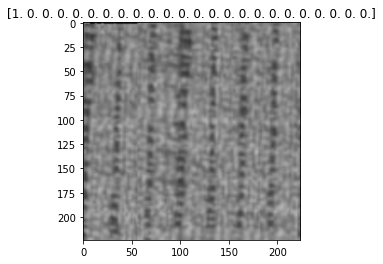

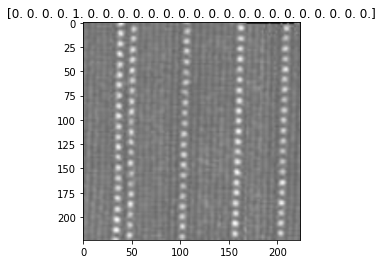

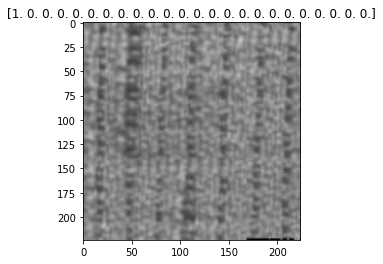

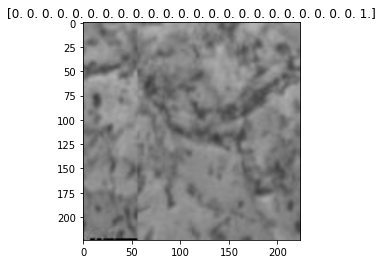

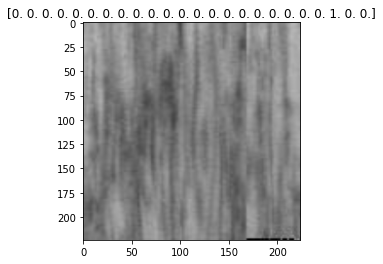

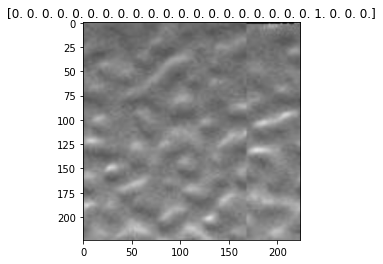

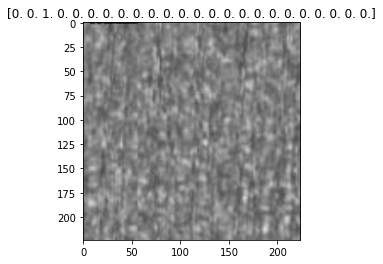

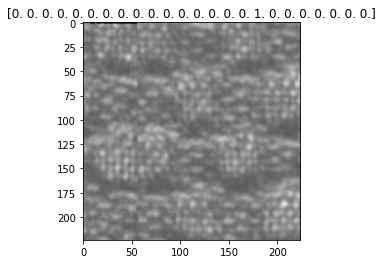

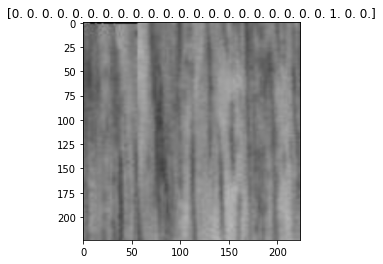

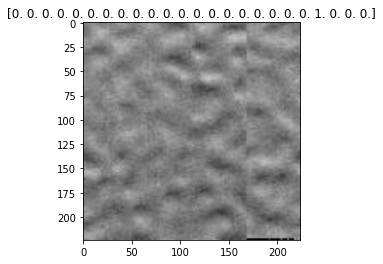

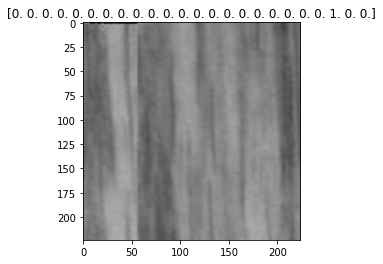

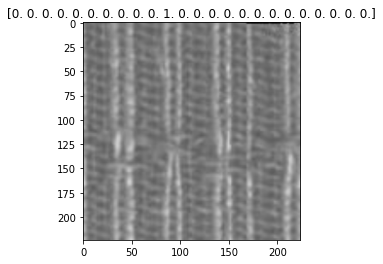

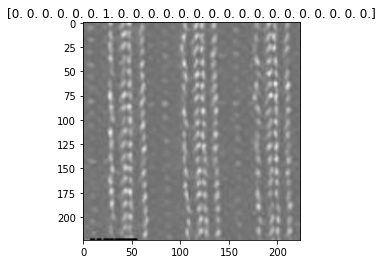

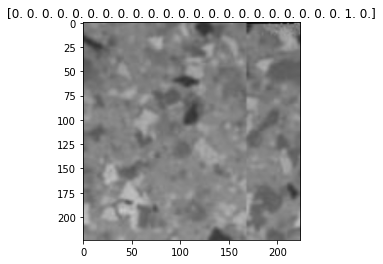

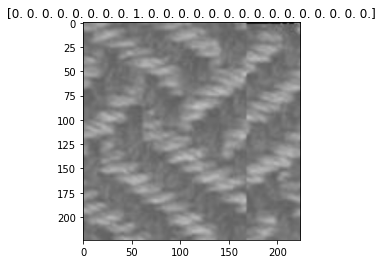

In [ ]:
import matplotlib.pyplot as plt
def getSamplesFromDataGen(resultData):
    x = resultData.next() #fetch the first batch
    a = x[0] # train data
    b = x[1] # train label
    for i in range(0,24):
        plt.imshow(a[i])
        plt.title(b[i])
        plt.show()
getSamplesFromDataGen(augmented_training_data)

In [73]:
import tensorflow as tf
import tensorflow_hub as hub
feature_extractor_model = 'https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/classification/5'
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [74]:

num_of_classes=24

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              2555993   
                                                                 
 dense_2 (Dense)             (None, 24)                24048     
                                                                 
Total params: 2,580,041
Trainable params: 24,048
Non-trainable params: 2,555,993
_________________________________________________________________


In [75]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
  metrics=['acc'])
history=model.fit(X_train,y_train,epochs=5)
#history = model.fit_generator(augmented_training_data, epochs = 5)

Epoch 1/5
24/24 [==============================] - 13s 309ms/step - loss: 1.4891 - acc: 0.6641
Epoch 2/5
24/24 [==============================] - 7s 306ms/step - loss: 0.1188 - acc: 0.9896
Epoch 3/5
24/24 [==============================] - 7s 306ms/step - loss: 0.0533 - acc: 0.9948
Epoch 4/5
24/24 [==============================] - 7s 307ms/step - loss: 0.0405 - acc: 0.9935
Epoch 5/5
24/24 [==============================] - 7s 306ms/step - loss: 0.0274 - acc: 0.9974


In [77]:
model.evaluate(X_test,y_test)   

6/6 [==============================] - 2s 339ms/step - loss: 0.0299 - acc: 1.0000


[0.029940247535705566, 1.0]

In [78]:
model.save('MobileNetV3_WithoutAug_5epochs_Outex')

INFO:tensorflow:Assets written to: MobileNetV3_WithoutAug_5epochs_Outex/assets


INFO:tensorflow:Assets written to: MobileNetV3_WithoutAug_5epochs_Outex/assets


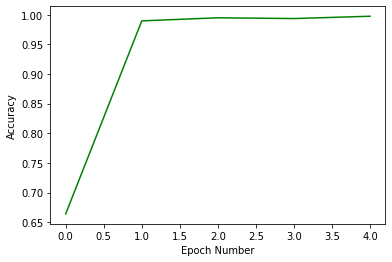

In [79]:
# plotting the graphs of epoch, accuracy and loss

import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history['acc'], color = 'green')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
fig1 = plt.gcf()
plt.show()
fig1.savefig('PlotAccuracyMobileNetV3_5epochs_Outex',dpi=100)

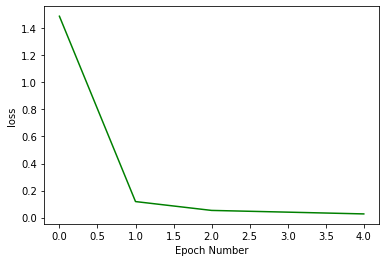

In [80]:
# plotting the losses
plt.plot(history.epoch, history.history['loss'], color = 'green')
plt.xlabel('Epoch Number')
plt.ylabel('loss')
fig1 = plt.gcf()
plt.show()
fig1.savefig('PlotLossesMobileNetV3_5epochs_Outex',dpi=100)

In [81]:
# confusion matrix
from sklearn.metrics import confusion_matrix

y_true = np.argmax(y_test, axis = 1) # decoding

predict_x=model.predict(X_test) 
predicted_classes=np.argmax(predict_x,axis=1)

confusion_mat = confusion_matrix(y_true, predicted_classes)

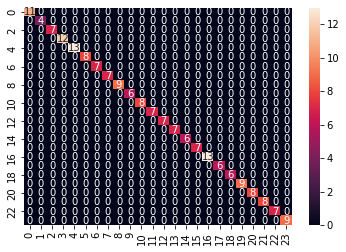

In [82]:
import seaborn as sns
sns.heatmap(confusion_mat, annot = True)
fig1 = plt.gcf()
plt.show()

In [83]:
fig1.savefig('ConfusionMatrixMobileNetV3_5epochs_Outex',dpi=100)

In [84]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

In [85]:
from sklearn.metrics import classification_report

In [86]:
print('Classification Report')
target_names = ['canvas001','canvas002' ,'canvas003' ,'canvas005' ,'canvas006' ,'canvas009' ,'canvas011' ,'canvas021' ,'canvas022' ,'canvas023' ,'canvas025' ,'canvas026' ,'canvas031' ,'canvas032' ,'canvas033' ,'canvas035' ,'canvas038' ,'canvas039' ,'tile005','tile006','carpet002','carpet004','carpet005','carpet009']
print(classification_report(y_true, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

   canvas001       1.00      1.00      1.00        11
   canvas002       1.00      1.00      1.00         4
   canvas003       1.00      1.00      1.00         7
   canvas005       1.00      1.00      1.00        12
   canvas006       1.00      1.00      1.00        13
   canvas009       1.00      1.00      1.00         8
   canvas011       1.00      1.00      1.00         7
   canvas021       1.00      1.00      1.00         7
   canvas022       1.00      1.00      1.00         9
   canvas023       1.00      1.00      1.00         6
   canvas025       1.00      1.00      1.00         8
   canvas026       1.00      1.00      1.00         7
   canvas031       1.00      1.00      1.00         7
   canvas032       1.00      1.00      1.00         7
   canvas033       1.00      1.00      1.00         6
   canvas035       1.00      1.00      1.00         7
   canvas038       1.00      1.00      1.00        13
   ca